# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 27 октября 23:59
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [43]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

exec: Failed to execute process '/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/bin/pip': The file specified the interpreter '/Users/aitore_04/Desktop/python_prac/myenv/bin/python3.12', which is not an executable command.
fish: No matches for wildcard 'https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs'. See `help wildcards-globbing`.
gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^


In [44]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

Решение и ответ:

для $\frac{n+1}{n} X_{(n)}$:

Функция распределения - $F_{\frac{n+1}{n} X_{(n)}}(x) = F_{X_1}(\frac{n}{n+1}x)^n$

Плотность - $p_{\frac{n+1}{n} X_{(n)}}(x) = n(\frac{nx}{(n+1)\theta})^{n-1} \frac{n}{(n+1)\theta} I(\frac{nx}{n+1} \leq \theta)$


для $(n+1)X_{(1)}$:

Функция распределения - $F_{(n+1)X_{(1)}}(x) = 1 - (1 - F_{X_1}(\frac{t}{n+1}))^n$

Плотность - $p_{(n+1)X_{(1)}}(x) = n(1 - \frac{t}{(n+1)\theta})^{n-1}$

Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

Из семинаров по математической статистики - ясно что риск для трех первых оценок вычисляется по следующем формулам:

$2\overline X :   R(\hat \theta, \theta) = \frac{\theta^2}{3n}$

$\frac{n+1}{n}X_{n}:    R(\hat \theta, \theta) = \frac{\theta^2}{n(n+1)}$

$(n+1)X_{1}:   R(\hat \theta, \theta) = \frac{n}{n+1} \theta^2 $



In [45]:
theta = 1
N = 1000

In [46]:
sample = sps.uniform.rvs(0, theta, size=(N,N))

In [47]:
def first_estimate(sample):
    return 2 * sample.mean(-1)

def second_estimate(sample):
    return sample.max(-1) * (N + 1) / N

def third_estimate(sample):
    return sample.min(-1) * (N + 1)

def fourth_estimate(sample):
    return sample.mean(-1) + sample.max(-1) / 2

def fifth_estimate(sample):
    return sample.min(-1) + sample.max(-1)

In [48]:
risks = []
risks.append(np.mean((first_estimate(sample) - theta)**2))
risks.append(np.mean((second_estimate(sample) - theta)**2))
risks.append(np.mean((third_estimate(sample) - theta)**2))
risks.append(np.mean((fourth_estimate(sample) - theta)**2))
risks.append(np.mean((fifth_estimate(sample) - theta)**2))


for risk in risks:
    print(np.round(risk, 5))



0.00034
0.0
1.00134
9e-05
0.0


Постройте распределения оценок для одного $\theta$ на одном графике

In [49]:
estimations = np.empty((5, N))
 #[1, 2, 3, 4, 5]

estimations[0] = 2 * sample.mean(axis=1)

estimations[1] = sample.mean(axis=1) + sample.max(axis=1) / 2

estimations[2] = (N + 1) * sample.min(axis=1)

estimations[3] = sample.min(axis=1) + sample.max(axis=1)

estimations[4] = (N + 1) / N * sample.max(axis=1)

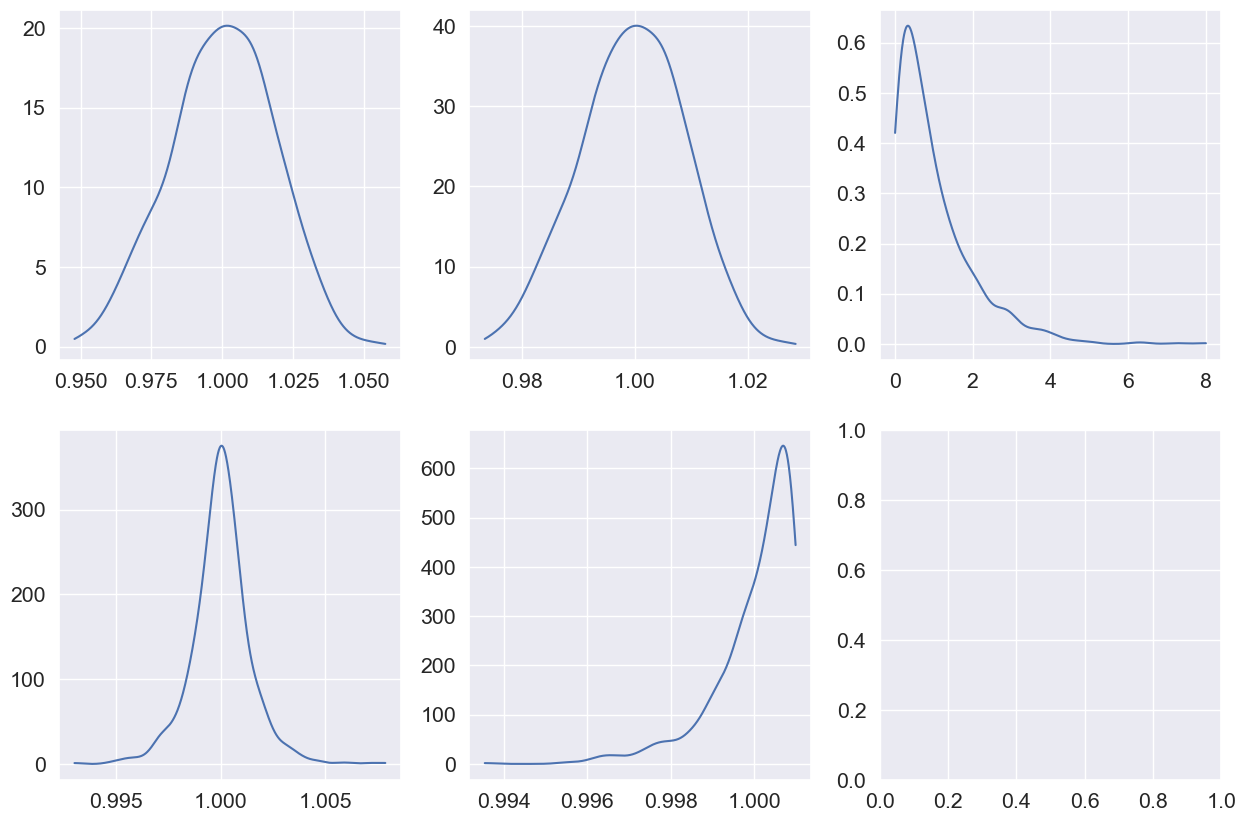

In [50]:
kernels = []
fig, axe = plt.subplots(2, 3, figsize = (15, 10))

for i, loc in enumerate(axe.flat):
    if i == 5:
        break
    x = np.linspace(min(estimations[i]), max(estimations[i]), 1000)
    kernels.append(sps.gaussian_kde(estimations[i]))
    loc.plot(x, kernels[i](x))
plt.show()



Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

Ответ: Да, согласуется. Посути "Риск" накапливает информацию об среднем отклонении оценки от истинного значения параметра, в то время как лучшая оценка как раз таки минимально отклоняется от значения параметра. Другими словами почти вся вероятность должна быть сконцентрирована в окретсности параметра

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.

Ответ:

Неравенство Рао-крамера:

Пусть $\Theta$ - множество параметров, выполнены условия регулярности, $\hat \theta$ - несмещена относительно $\tau(\theta)$. Тогда $\forall \theta \in \Theta$ выполнено:

$$ D_{\theta} \hat \theta \geq \frac{\tau'(\theta)^2}{ni(\theta)} $$

где $i(\theta)$ - информация Фишера одного наблюдения.


Так как оценка смещена, то можно устверждать что $R(\hat \theta, \theta) = D_{\theta} \hat \theta$.


После вычислении $i(\theta) = \frac{1}{\theta^2}$, $\frac{\tau'(\theta)^2}{ni(\theta)} = \frac{\theta^2}{n} $.

В нашем случае оценки несмещены, однако в Равномерном распределении не выполняюьтся условие регулярности из чего следует что неравенство Рао-Крамера не выполняется. Это можно заметить по рискам первых двух оценок ($\frac{\theta^2}{3n}, \frac{\theta^2}{n(n+1)} < \frac{\theta^2}{n}$). То есть в данном случае наши оценки лучше чем нижняя гранца из неравенства Рао-Крамера

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

In [51]:
def l(x, y):
    return np.abs(x-y)

In [52]:
risks = []
risks.append(np.mean(l(first_estimate(sample), theta)))
risks.append(np.mean(l(second_estimate(sample), theta)))
risks.append(np.mean(l(third_estimate(sample), theta)))
risks.append(np.mean(l(fourth_estimate(sample), theta)))
risks.append(np.mean(l(fifth_estimate(sample), theta)))

In [53]:
for risk in risks:
    print(risk)

0.014939023867201187
0.0007418137717797743
0.7389729222944407
0.007504644708956341
0.0010055861521693528


Риски явно увеличились, но порядок качества сильно не изменился

Вернёмся к вадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = 2xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

Байесовский риск будет выглядить следующем обазом:
$$R(\hat\theta) = E_{Q}(\hat\theta - \theta)^2 = \int_{\Theta} (\hat\theta - \theta)^2 q(\theta) d\theta $$

Посчитаем Байесовский риск с помощью метода Монте-Карло:

In [54]:
theta_increment = np.linspace(0, 1, 1000)

In [55]:
risks = []
risks.append(np.mean((first_estimate(sample) - theta_increment)**2 * 2 * theta_increment))
risks.append(np.mean((second_estimate(sample) - theta_increment)**2 * 2 * theta_increment))
risks.append(np.mean((third_estimate(sample) - theta_increment)**2 * 2 * theta_increment))
risks.append(np.mean((fourth_estimate(sample) - theta_increment)**2 * 2 * theta_increment))
risks.append(np.mean((fifth_estimate(sample) - theta_increment)**2 * 2 * theta_increment))


for risk in risks:
    print(np.round(risk, 5))


0.16669
0.16652
1.17999
0.16619
0.16652


Как мы видим все оценки стали иметь одинаковый риск с точностью до 3-го знака, кроме конечно $(n+1)X_{1} $

Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

In [56]:
risks = []
risks.append(np.mean((first_estimate(sample) - theta_increment)**2 * 2 * (1 - theta_increment**2)))
risks.append(np.mean((second_estimate(sample) - theta_increment)**2 * 2 * (1 - theta_increment**2)))
risks.append(np.mean((third_estimate(sample) - theta_increment)**2 * 2 * (1 - theta_increment**2)))
risks.append(np.mean((fourth_estimate(sample) - theta_increment)**2 * 2 * (1 - theta_increment**2)))
risks.append(np.mean((fifth_estimate(sample) - theta_increment)**2 * 2 * (1 - theta_increment**2)))


for risk in risks:
    print(np.round(risk, 5))


0.60107
0.60042
1.93385
0.5998
0.60042


при $q(x) = 1 - x^2 $ оценка $\overline X + X_{n} / 2$ ведет себя чуть лучше остальных

Сделайте вывод о сравнении оценок и теореме Рао-Крамера

$\frac{n+1}{n}X_{n}$ является наилучшей оценкой среди предоставленных. Так как не выполнены условия регулярности то Неравенство Рао-Крамера не всегда выполняется. Действительно, риск $\frac{n+1}{n}X_{n}$ намного ниже чем нижняя оценка из неравенства ($\frac{\theta^2}{n(n+1)} < \frac{\theta^2}{n} $)

Но в случае среднего нижняя оценка дала правильный результат с точностью до константы ($\frac{\theta^2}{3n} $)

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [57]:
weibull_sample = np.loadtxt("Weibull.csv")

1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

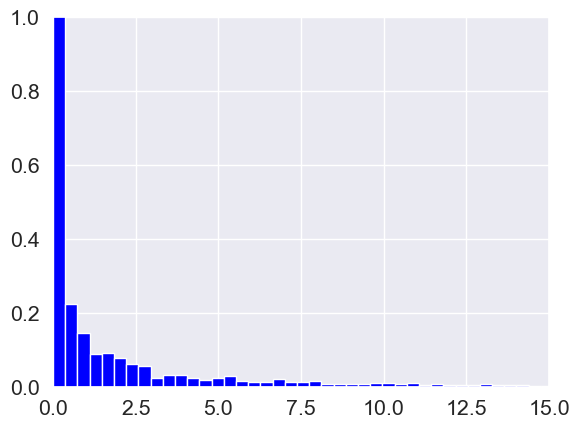

In [58]:
plt.hist(weibull_sample, density=True, bins=1000, color="blue")
plt.xlim(0, 15)
plt.ylim(0, 1)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

#### Мои ответы:

а.Думаю что нет, так как теоретически плотность в нуле равняется нулю

б.Компьтеры могли округлить выборку до ближайших рациональных чисел, от есть до нуля (наверное)

Проблему с нулями можно решить - заменив нули маленькими значениями.
Проблема с логарифмом решится, а также очень мелкие знавения не должны повлиять на оценку. Но пробема в том что мы на прямую меняем данные что делает их не правдаподобными

In [95]:
weibull_sample[weibull_sample == 0] = 1e-10

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

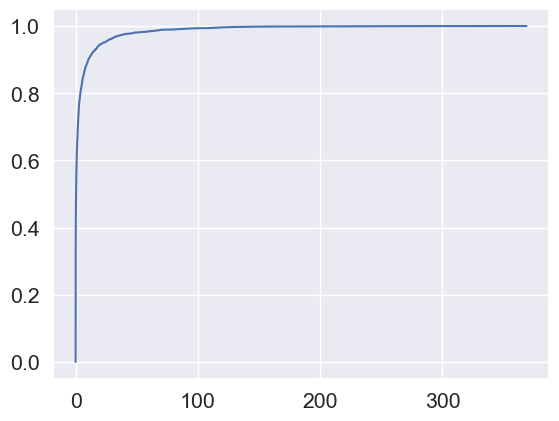

In [127]:
x = weibull_sample
n = weibull_sample.size
F_emp = np.arange(1, n+1) / n

plt.plot(np.sort(weibull_sample), F_emp)

In [128]:
y_emp, x_emp = np.log(-np.log(1 - F_emp)), np.log(x)

/var/folders/5d/bsm3kt3d4qdc55zn6zggxf800000gq/T/ipykernel_89648/1269688593.py:1: RuntimeWarning: divide by zero encountered in log
  y_emp, x_emp = np.log(-np.log(1 - F_emp)), np.log(x)


**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

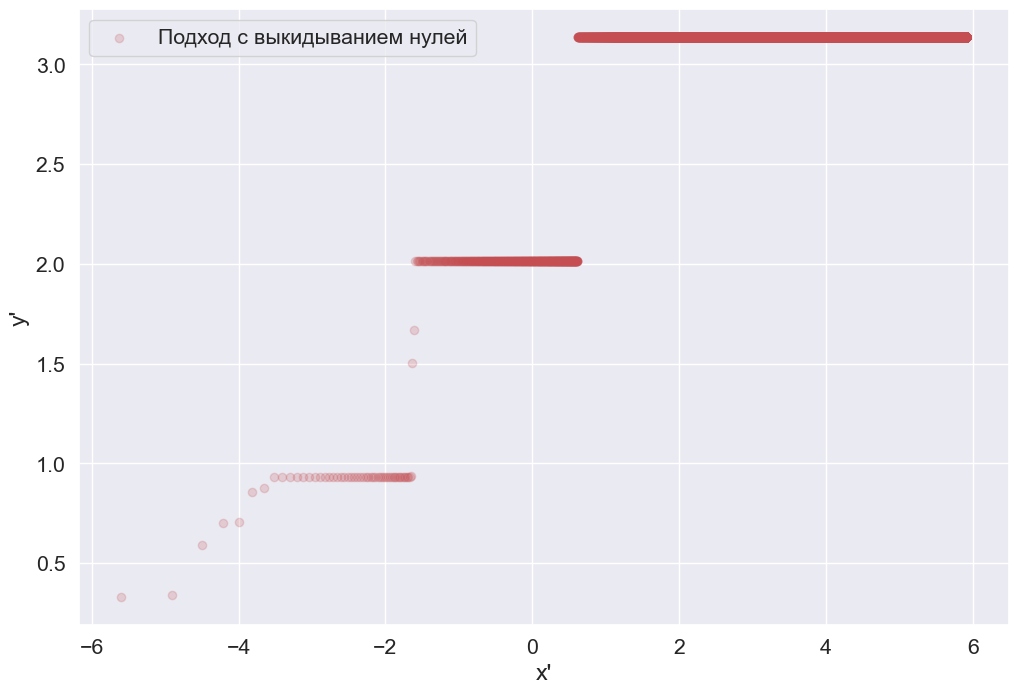

In [88]:
plt.figure(figsize=(12, 8))

plt.xlabel("x'")
plt.ylabel("y'")

plt.scatter(x_emp, y_emp, color="r", alpha=0.2, label="Подход с выкидыванием нулей")

plt.legend()
plt.grid(True)
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:**

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение:

Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

Решение (вывод метода моментов для каждого случая):

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше.

*Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (аналитический вывод оценок):

Моделирование:

**Вывод:**

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Ответ:

2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

**Вывод:**

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, fbs, chol

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство:

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ:

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Ответ:

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Сделайте вывод о выборе априорного распределения.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

У какой модели выше обоснованность? Почему?

Сделайте вывод о байесовском оценивании: